In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0326-07.aice.nc')
plotvar = data.variables['aice'][0,:,:]
lont = data.variables['lont_bounds'][:,:,0]
latt = data.variables['latt_bounds'][:,:,0]

In [3]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0326-07.hi.nc')
plotvar2 = data2.variables['hi'][0,:,:]

In [4]:
lont = lont[:,:]

In [5]:
latt = latt[:,:]

In [6]:
plotvar = plotvar[:,:]
#plotvar = plotvar[250:550,:]

In [7]:
plotvar

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+30,
  dtype=float32)

In [7]:
lont2 = lont[200:,1200]
latt2 = latt[200:,1200]

In [8]:
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,210,220,230,240,290,300])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [0,80,85,87,89,90,91,92,93,95,98,100]
        nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)


/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


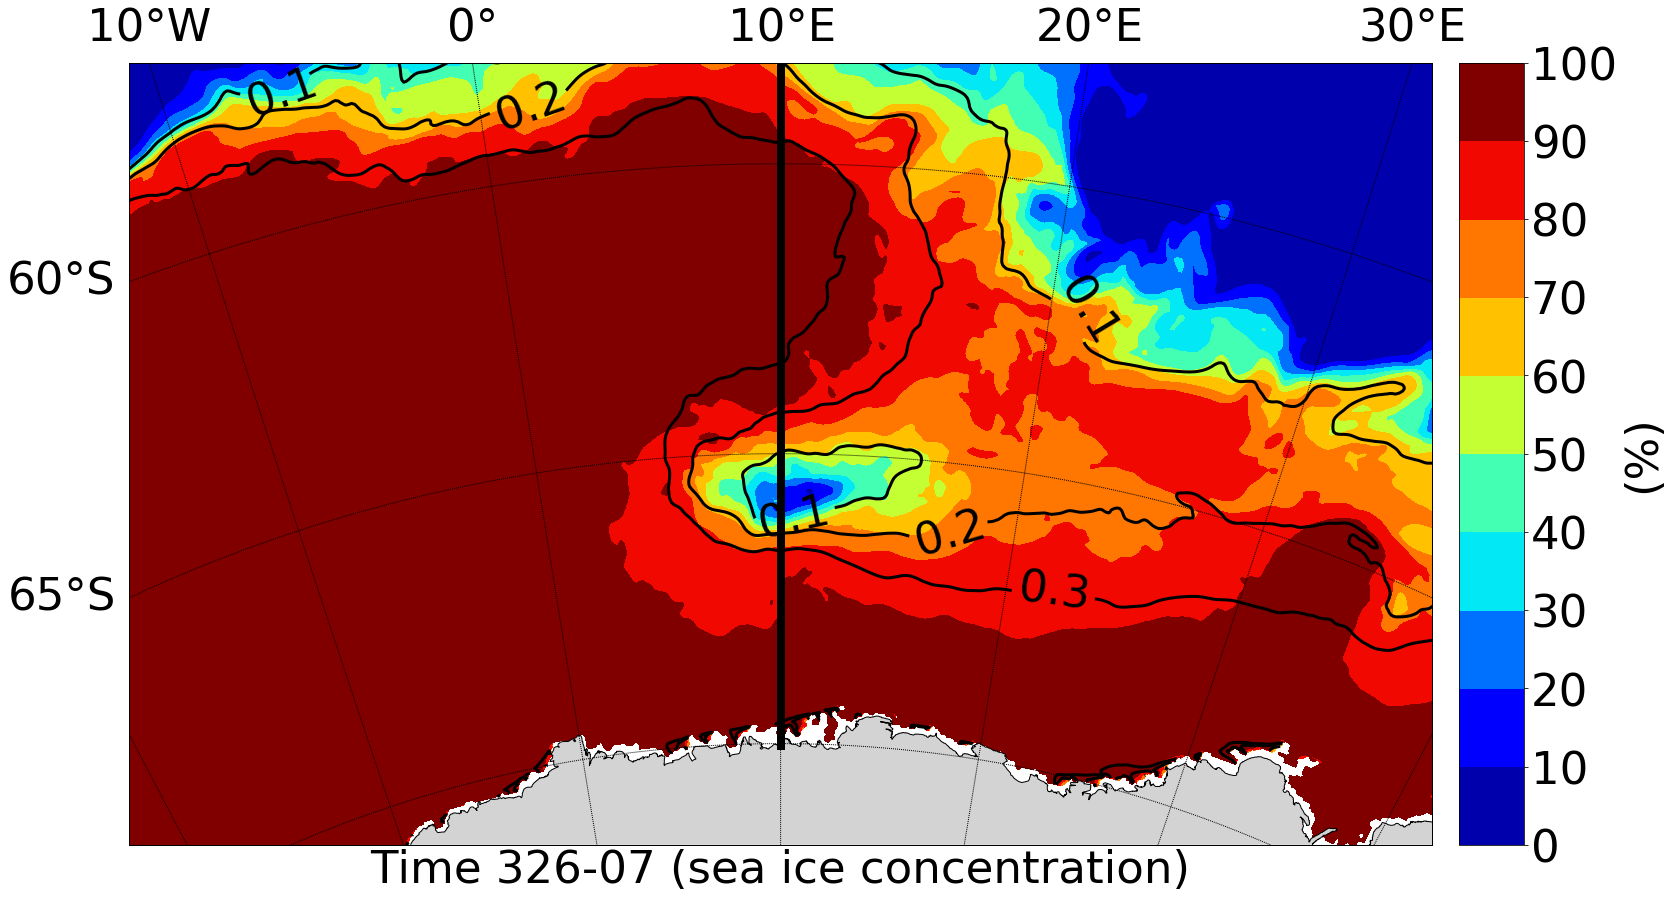

In [9]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 2500000,height = 1500000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'black',linewidth=8)

CS=map.contour(x,y,plotvar2,[0.1,0.2,0.3],colors = 'black', linestyles = 'solid',linewidths=3)
plt.clabel(CS,fontsize=45,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("Time 326-07 (sea ice concentration)",**my_font)
plt.savefig("ice326-07.png",bbox_inches='tight')